# Decision making under uncertainty

In this lecture, you learned about how the Markov decision process (MDP) framework can be extended to allow uncertainty about the states. This can be used to model a wide range of decision-making problems where there is uncertainty or noise associated with the state of the world.

We considered the example of the random dot motion discrimination task, where a subject must indicate the direction in which the majority of dots are moving. In this assignment, you will solve a two-stage formulation of this task, where the decision-maker can either make an immediate decision (i.e., at the first stage) on the basis of initial information, or choose to wait and gather further information before making their choice (i.e., at the second stage). The complete description of the problem can be found in the lecture slides and also in the original paper: http://www.gatsby.ucl.ac.uk/~dayan/papers/NDM002wc.pdf

Your task is to reproduce the plots from Figure 9 of the paper, interpret the results, and explain the steps of the solution.

In [224]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Define the parameters of the model (0.5 pts)

In [225]:
# INSERT CODE HERE
mu_1 = 6
mu_2 = 4
sigma = 1
r_c = -0.1
r_1 = [1,0]
r_2 = [0,1]

## 1. Updating the belief state  (2.5 pts)
The actual direction of motion ('state') is not completely observable to the subject. Hence, the subject can only rely on observations to compute the *belief* that the direction of motion is left or right (this is the posterior probability or 'belief state'). 

### 1a. Write a function that will calculate this posterior given the prior belief and an observation (the belief update). (0.5 pt)

In [226]:
# INSERT CODE BELOW
def belief_update(c, mu_1, mu_2, sigma):
    pc_x1 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(c - mu_1)**2 / (2 * sigma**2))
    pc_x2 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(c - mu_2)**2 / (2 * sigma**2))
    
    d = 0.5 * (pc_x1 + pc_x2)
    
    c_px1 = 0.5 * pc_x1 / d
    c_px2 = 0.5 * pc_x2 / d

    return c_px1, c_px2


### 1b. Use this function to update the belief on the first observation at step $\beta$ and reproduce Fig 9A.  Interpret the plot. (1 pt)

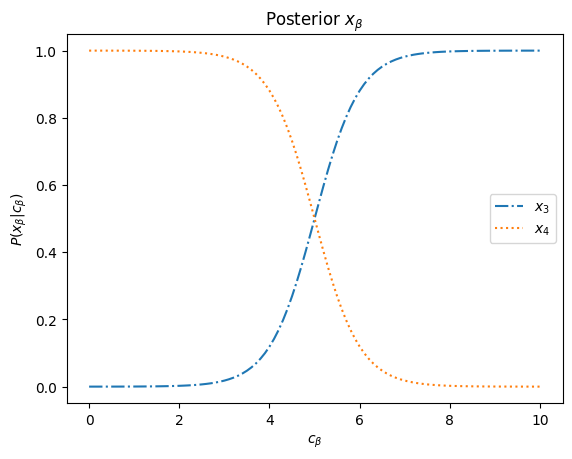

In [230]:
# INSERT CODE BELOW
c = np.linspace(0, 10, 101)

beliefs = np.zeros(shape=(101, 2))
for c in range(cs.shape[0]):
    beliefs[c, :] = belief_update(cs[c], mu_1, mu_2, sigma)

plt.plot(cs, beliefs[:, 0], label=r'$x_3$',linestyle='dashdot')
plt.plot(cs, beliefs[:, 1], label=r'$x_4$',linestyle='dotted')
plt.xlabel(r'$c_{\beta}$')
plt.ylabel(r'$P(x_{\beta} | c_{\beta})$')
plt.title(r'Posterior $x_{\beta}$')
plt.legend()
plt.show()

INSERT ANSWER BELOW
The plot shows how certain a stimulus belongs to a state. At small stimuli observations, the belief state x3 is larger than that of x4, and for larger ones, it is the other way around. At c_beta = 5, the probabiloty of belonging to a state is equal for both states.

### 1c. Write a function to update the belief on observing another sample at step $\alpha$ and reproduce Fig 9B.  Interpret the plot. (1 pt)
Hint: You will have to calculate this probability for every possible pair of observations.

In [ ]:
# INSERT CODE BELOW
def belief_update_alpha(alpha, beta, m1, m2, sigma):
    ca_x1 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(alpha - m1)**2 / (2 * sigma**2))
    ca_x2 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(alpha - m2)**2 / (2 * sigma**2))
    cb_x3 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(beta - m1)**2 / (2 * sigma**2))
    cb_x4 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(beta - m2)**2 / (2 * sigma**2))
    
    x1_ca_cb_x3 = ca_x1 * cb_x3
    x2_ca_cb_x4 = ca_x2 * cb_x4

    x1_ca_cb = x1_ca_cb_x3 / (x1_ca_cb_x3 + x2_ca_cb_x4)
    
    return x1_ca_cb


In [ ]:
n = 101
c = np.linspace(0,10,n)

beliefs = np.zeros(shape=(n,n))
for beta in range(c.shape[0]):
    for alpha in range(c.shape[0]):
        beliefs[beta,alpha] = belief_update_alpha(c[alpha], c[beta],mu_1,mu_2,sigma)

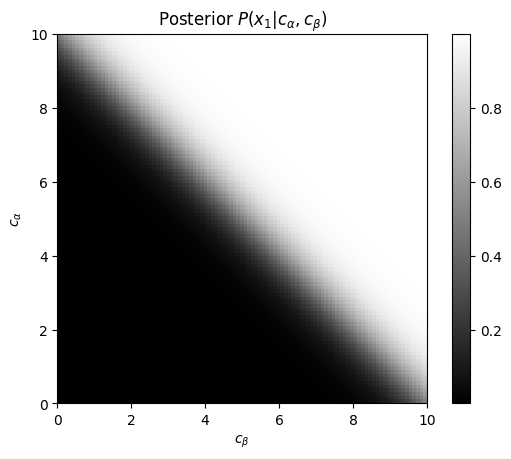

In [ ]:
plt.imshow(beliefs, cmap='gray',extent=[0, 10, 0, 10], origin='lower')
plt.xlabel(r'$c_{\beta}$')
plt.ylabel(r'$c_{\alpha}$')
plt.title(r'Posterior $P(x_{1} | c_{\alpha},c_{\beta})$')
plt.colorbar()
plt.show()


INSERT ANSWER BELOW
The two observations are on the x and y axis. The brighter (more white) the color is, the more likely it is that the simukus is in state x1. Bölack means it it less likely. The diagonal shows the mean of observations, where it is equally likely that the stimulus is in x1 or x2. (x2 is 1 - the result above). This means on the diagonal in the middle it is most uncertain, more towards the black or white edges it becomes more certain.

## 2. Solving for the optimal actions (7 pts)
Now that we have a way to update the belief states, we can use them to determine the best course of action at each of the steps (the 'optimal policy'). 

### 2a. When finding the optimal policy, why does it make sense to calculate the best action at the final stage $\alpha$, and work backwards? (1 pt)

INSERT ANSWER BELOW
There are only two actions to find the optimal policy, we need only the belief state and rewards. It makes sense to calculate the action in the final stage and go backwards because the initial choice is dependend on the later choices.

### 2b. Write a function that will calculate the value of the best action at $\alpha$ and reproduce Fig 9C. Explain what the plot shows. (1 pt)

In [ ]:
# INSERT CODE BELOW
def value_alpha(p_x1, p_x2):
    p1 = p_x1 * np.max(r_1)
    p2 = p_x2 * np.max(r_2)
    v_alpha = np.max((p1,p2),axis=0)
    return v_alpha

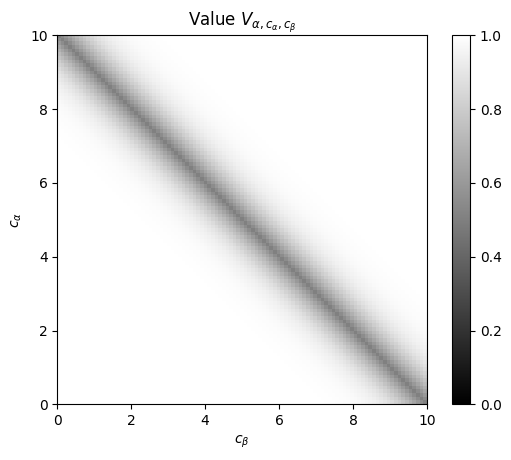

In [ ]:
n = 101
c = np.linspace(0,10,n)

beliefs = np.zeros(shape=(n,n))
v = np.zeros(shape=(n,n))

for beta in range(c.shape[0]):
    for alpha in range(c.shape[0]):
        beliefs[beta,alpha] = belief_update_alpha(c[alpha], c[beta],mu_1,mu_2,sigma)
        v[beta,alpha] = value_alpha(beliefs[beta,alpha], 1-beliefs[beta,alpha])

plt.imshow(v, cmap='gray', vmin=0, vmax=1,extent=[0, 10, 0, 10], origin='lower')
plt.xlabel(r'$c_{\beta}$')
plt.ylabel(r'$c_{\alpha}$')
plt.title(r'Value $V_{\alpha,c_{\alpha},c_{\beta}}$')
plt.colorbar()
plt.show()


INSERT ANSWER BELOW

The plot shows the expected q values. The values are high (white) when the subject can be sure ehat action to perform. when the cues are inconsistent, the value is closer to the grey diagonal (which has values closwr to 0.5), which means it is more random guessing.

### 2c. Before finding the best action at $\beta$, we have one more step to do. We need the values of the best actions at $\alpha$ that we just calculated and the probability of observing $c_{\alpha}$ given $c_{\beta}$ ($P(c_{\alpha} | c_{\beta})$). Why? (1 pt)

INSERT ANSWER BELOW
Because we consider all probabilities. Before the belief state can be updated, we therefore need to calculate c alpha given c beta.

### 2d. Write a function that will calculate $P(c_{\alpha} | c_{\beta})$ and reproduce Fig 9D. Explain how you calculated this probability and what the plot shows. (1 pt)
Hint: You will have to marginalise the posteriors over the possible states.

In [ ]:
# INSERT CODE BELOW

def ca_cb(cb, ca, mu_1, mu_2, sigma):
    ca_x1 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(ca - mu_1)**2 / (2 * sigma**2))
    ca_x2 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(ca - mu_2)**2 / (2 * sigma**2))
    cb_x3 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(cb - mu_1)**2 / (2 * sigma**2))
    cb_x4 = 0.5 * (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(cb - mu_2)**2 / (2 * sigma**2))

    cond_ca_cb = ca_x1 * cb_x3 + ca_x2 * cb_x4
    cb = 0.5 * (cb_x3 + cb_x4)
    ca_cb= cond_ca_cb / cb

    return ca_cb


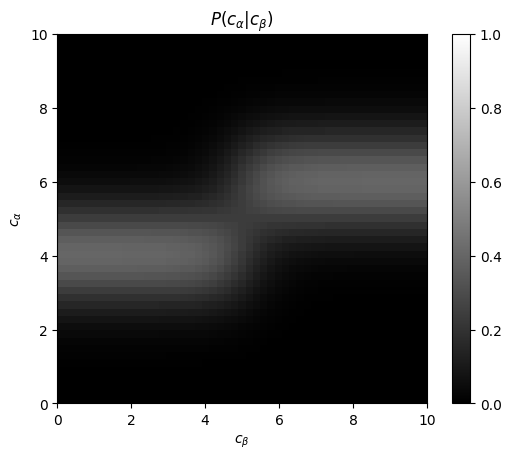

In [ ]:
n = 51
c = np.linspace(0,10,n)

p = np.zeros(shape=(n,n))
for alpha in range(c.shape[0]):
    for beta in range(c.shape[0]):
        p[alpha,beta] = ca_cb(c[beta], c[alpha],mu_1,mu_2,sigma)


plt.imshow(p, cmap='gray', vmin=0, vmax=1, extent=[0, 10, 0, 10], origin='lower')
plt.xlabel(r'$c_{\beta}$')
plt.ylabel(r'$c_{\alpha}$')
plt.title(r'$P(c_{\alpha}|c_{\beta})$')
plt.colorbar()
plt.show()

INSERT ANSWER BELOW

This shows the conditional distribution. It shows that very small or very large c alpha are very unlikely. for larger c beta, the c alpha that is expected to oberserve is larger. At c beta being arounf 0.5, the uncertainty is higher.

### 2e. We are now ready to find the best action at $\beta$. Write a function that calculates the values associated with each of the actions and reproduce Fig 9E. What does the plot tell you about what the best action is at $\beta$? (1 pt)
Hint: For action C, you will have to numerically integrate over possible observations ${c_{\alpha}}$ using the step size ($dc_{\alpha}$) you defined on your Gaussian observation distribution. 

In [ ]:
# INSERT CODE BELOW
import numpy as np

def q_b_val(c_b):
    ps_belief_state = belief_update(c_b,mu_1,mu_2,sigma)
    qs = ps_belief_state * np.array([r_1[0], r_2[1]])
    return np.concatenate([qs, [0]])

def integrate(ca, c_beta, ca_x,step_size):
    beliefs = belief_update_alpha(ca, c_beta,mu_1,mu_2,sigma)
    value = value_alpha(beliefs, 1 - beliefs)
    value = value * ca_x
    integral = np.trapz(value, ca, dx=step_size)
    return integral

def q_cb_val(c_b):
    step_size = 0.01

    ca = np.arange(0, 10 + step_size, step_size)
    ca_x1 = np.exp(-0.5 * ((ca - mu_1) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    ca_x2 = np.exp(-0.5 * ((ca - mu_2) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

    integral1 = integrate(ca, c_b, ca_x1,step_size)
    integral2 = integrate(ca, c_b, ca_x2,step_size)

    return r_c + belief_update(c_b,mu_1,mu_2,sigma)[0] * integral1 + belief_update(c_b,mu_1,mu_2,sigma)[1] * integral2


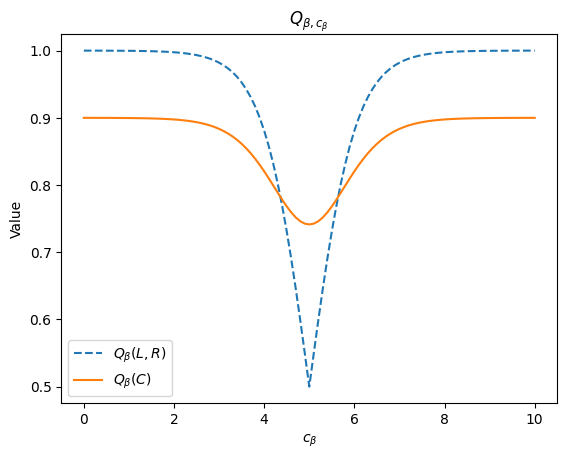

In [231]:
n = 101
c = np.linspace(0,10,n)

q_b = np.zeros(shape=(n,3))
for c_b in range(c.shape[0]):
    q_b[c_b,] = q_b_val(c[c_b])
    q_b[c_b,2] = q_cb_val(c[c_b])

plt.plot(c, np.max(q_b[:,:2], axis=1), label = r'$Q_{\beta}(L,R)$',linestyle= 'dashed')
plt.plot(c, q_b[:,2], label = r'$Q_{\beta}(C)$')
plt.xlabel(r'$c_{\beta}$')
plt.ylabel("Value")
plt.title(r'$Q_{\beta,c_{\beta}}$')

plt.legend()

INSERT ANSWER BELOW

When the expected value of action C surpasses the best among immediate actions, it is advantageous to wait for an additional observation. In ranges of c beta where the blue graph takes higher valies that the orange one, the expected values of directly choosing A or B exceed that of choosing C. In the range between 4.2 - 5.8 (where the orange graph takes hgher values than the blue one), the lower cost of probing outweighs the information gain, making the selection of action C more favorable.

### 2f. What will reduce (or increase) the range of observations at $\beta$ where it is best to choose to wait for another observation (choosing C)? Can you tweak a parameter to do this and produce a plot similar to Fig 9E to show this? (2 pts)
Hint: You will have to re-run the steps with this changed parameter. 

Text(0.5, 1.0, '$Q_{\\beta,c_{\\beta}}$')

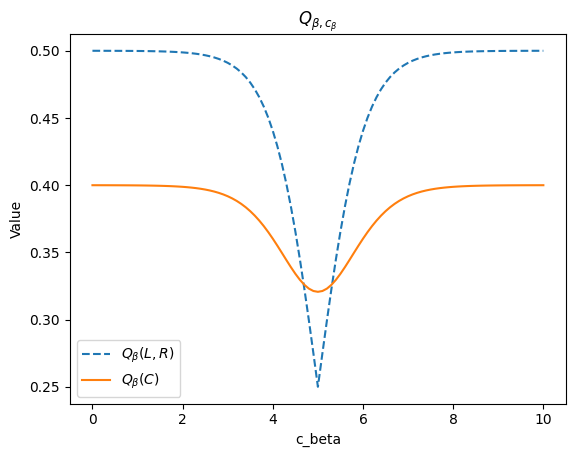

In [232]:
# INSERT CODE BELOW
mu_1 = 6
mu_2 = 4
sigma = 1
r_c = -0.1
r_1 = [0.5,0]
r_2 = [0,0.5]

n = 101
c = np.linspace(0,10,n)

q_b = np.zeros(shape=(n,3))
for c_b in range(c.shape[0]):
    q_b[c_b,] = q_b_val(c[c_b])
    q_b[c_b,2] = q_cb_val(c[c_b])
plt.plot(c, np.max(q_b[:,:2], axis=1), label = r'$Q_{\beta}(L,R)$',linestyle= 'dashed')
plt.plot(c, q_b[:,2], label = r'$Q_{\beta}(C)$')
plt.xlabel("c_beta")
plt.ylabel("Value")
plt.legend()
plt.title(r'$Q_{\beta,c_{\beta}}$')

Text(0.5, 1.0, '$Q_{\\beta,c_{\\beta}}$')

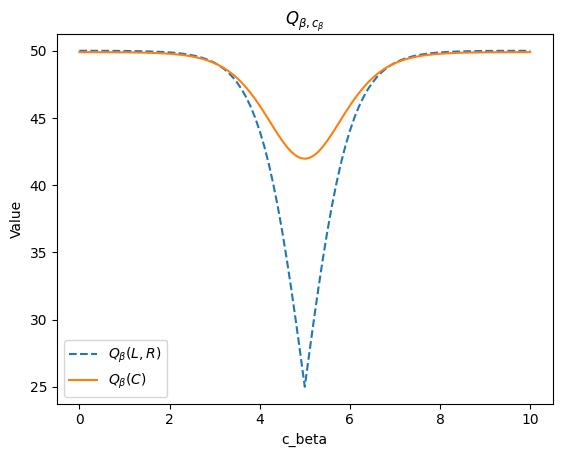

In [233]:
mu_1 = 6
mu_2 = 4
sigma = 1
r_c = -0.1
r_1 = [50,0]
r_2 = [0,50]

n = 101
c = np.linspace(0,10,n)

q_b = np.zeros(shape=(n,3))
for c_b in range(c.shape[0]):
    q_b[c_b,] = q_b_val(c[c_b])
    q_b[c_b,2] = q_cb_val(c[c_b])
plt.plot(c, np.max(q_b[:,:2], axis=1), label = r'$Q_{\beta}(L,R)$',linestyle= 'dashed')
plt.plot(c, q_b[:,2], label = r'$Q_{\beta}(C)$')
plt.xlabel("c_beta")
plt.ylabel("Value")
plt.legend()
plt.title(r'$Q_{\beta,c_{\beta}}$')

INSERT ANSWER BELOW

When rewards are increased significantly, the expected value of choosing action C becomes close to or even higher than choosing L or R over a wider range of c beta values. Shifting the means of the two distributions closer together expands the range where selecting action C is favored.
Conversely, reducing the reward has the opposite effect.The plot is shifted downwards, which decreases the range where it is favourable to wait for a second observation.